# Credit Card Transactions Fraud Detection Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

**Data Description:**
-	`index` - Unique Identifier for each row
-	`transdatetrans_time` - Transaction DateTime
-	`cc_num` - Credit Card Number of Customer
-	`merchant` - Merchant Name
-	`category` - Category of Merchant
-	`amt` - Amount of Transaction
-	`first` - First Name of Credit Card Holder
-	`last` - Last Name of Credit Card Holder
-	`gender` - Gender of Credit Card Holder
-	`street` - Street Address of Credit Card Holder
-	`city` - City of Credit Card Holder
-	`state` - State of Credit Card Holder
-	`zip` - Zip of Credit Card Holder
-	`lat` - Latitude Location of Credit Card Holder
-	`long` - Longitude Location of Credit Card Holder
-	`city_pop` - Credit Card Holder's City Population
-	`job` - Job of Credit Card Holder
-	`dob` - Date of Birth of Credit Card Holder
-	`trans_num` - Transaction Number
-	`unix_time` - UNIX Time of transaction
-	`merch_lat` - Latitude Location of Merchant
-	`merch_long` - Longitude Location of Merchant
-	`is_fraud` - Fraud Flag


## EDA

In [2]:
# Read the data
df = pd.read_csv('/Users/rachelchen/Desktop/Hackathon/dataset/fraud_detection/fraudTrain.csv')
df = df.iloc[:, 1:]
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
print(f'There are {df.shape[0]:,} rows and {df.shape[1]} columns in the dataset.')

There are 1,296,675 rows and 22 columns in the dataset.


In [4]:
# Check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [5]:
# Check for null values 
df.isnull().mean()

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [6]:
# Check how many catogries in each column
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

Let's try to encode the categorial columns that have counts less than 50. For categorial columns that have counts over than 50 let's investigate if we can drop it.

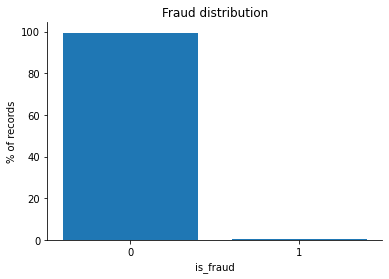

Class imbalance: [0.99 0.01]


In [7]:
# Fraud distribution
values, counts = np.unique(df['is_fraud'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100)
plt.xlabel('is_fraud')
plt.ylabel('% of records')
sns.despine()
plt.title('Fraud distribution')
plt.xticks(values, [0,1])
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

This is an extreme class imbalance issue, only 1% of transactions are classified as fraud. We can't perform machine learning algorithm to this. We will have to deal with the class imbalance.

### Data Wrangling 
The dataset is actually too big to run, so we will sample ~10% of the data as our dataset from this point on. All classes will be included in the subsample.

In [8]:
#Sample 10% of our data
df = df.sample(frac=0.1, random_state=1).reset_index(drop=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,...,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0
1,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,Colton,...,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0
2,2020-05-31 21:50:53,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,Brandon,...,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,7096316ec1a4b261e8613013827abae7,1370037053,27.254081,-81.974799,0
3,2019-09-20 17:06:52,2283743876903625,fraud_Conroy-Emard,food_dining,45.38,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,...,34.0770,-84.3033,165556,Prison officer,1997-12-27,d02c35d7bda19c3da84b6d01f02da7e8,1348160812,34.551957,-83.374265,0
4,2019-08-31 23:22:50,4798937978667559470,fraud_Adams-Barrows,health_fitness,27.52,Robert,Williams,M,09419 Lewis Rapids,Bay City,...,43.6088,-83.9530,67858,Water quality scientist,1995-03-13,dccf059d9fdc15f1fb9d2abb50e7314b,1346455370,43.032957,-83.521294,0


In [9]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,...,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0
1,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,Colton,...,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0
2,2020-05-31 21:50:53,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,Brandon,...,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,7096316ec1a4b261e8613013827abae7,1370037053,27.254081,-81.974799,0
3,2019-09-20 17:06:52,2283743876903625,fraud_Conroy-Emard,food_dining,45.38,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,...,34.0770,-84.3033,165556,Prison officer,1997-12-27,d02c35d7bda19c3da84b6d01f02da7e8,1348160812,34.551957,-83.374265,0
4,2019-08-31 23:22:50,4798937978667559470,fraud_Adams-Barrows,health_fitness,27.52,Robert,Williams,M,09419 Lewis Rapids,Bay City,...,43.6088,-83.9530,67858,Water quality scientist,1995-03-13,dccf059d9fdc15f1fb9d2abb50e7314b,1346455370,43.032957,-83.521294,0


In [10]:
print(f'There are {df.shape[0]:,} rows and {df.shape[1]} columns in the dataset.')

There are 129,668 rows and 22 columns in the dataset.


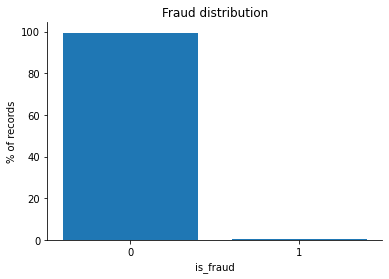

Class imbalance: [0.99 0.01]


In [11]:
# Fraud distribution
values, counts = np.unique(df['is_fraud'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100)
plt.xlabel('is_fraud')
plt.ylabel('% of records')
sns.despine()
plt.title('Fraud distribution')
plt.xticks(values, [0,1])
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

Distribution stays the same after sampling 

### Feature Engineering
Let's investigate the columns 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129668 entries, 0 to 129667
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  129668 non-null  object 
 1   cc_num                 129668 non-null  int64  
 2   merchant               129668 non-null  object 
 3   category               129668 non-null  object 
 4   amt                    129668 non-null  float64
 5   first                  129668 non-null  object 
 6   last                   129668 non-null  object 
 7   gender                 129668 non-null  object 
 8   street                 129668 non-null  object 
 9   city                   129668 non-null  object 
 10  state                  129668 non-null  object 
 11  zip                    129668 non-null  int64  
 12  lat                    129668 non-null  float64
 13  long                   129668 non-null  float64
 14  city_pop               129668 non-nu

In [13]:
# Check how many catogries in each column
df.nunique()

trans_date_trans_time    129442
cc_num                      951
merchant                    693
category                     14
amt                       22908
first                       345
last                        475
gender                        2
street                      951
city                        867
state                        51
zip                         940
lat                         938
long                        939
city_pop                    853
job                         486
dob                         936
trans_num                129668
unix_time                129442
merch_lat                129165
merch_long               129466
is_fraud                      2
dtype: int64

**Transaction DateTime**

In [14]:
# transfer object date to numerical date time
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_dayofweek
0,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,...,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0,2019,2,0
1,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,Colton,...,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0,2019,4,4
2,2020-05-31 21:50:53,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,Brandon,...,Environmental consultant,1978-11-30,7096316ec1a4b261e8613013827abae7,1370037053,27.254081,-81.974799,0,2020,5,6
3,2019-09-20 17:06:52,2283743876903625,fraud_Conroy-Emard,food_dining,45.38,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,...,Prison officer,1997-12-27,d02c35d7bda19c3da84b6d01f02da7e8,1348160812,34.551957,-83.374265,0,2019,9,4
4,2019-08-31 23:22:50,4798937978667559470,fraud_Adams-Barrows,health_fitness,27.52,Robert,Williams,M,09419 Lewis Rapids,Bay City,...,Water quality scientist,1995-03-13,dccf059d9fdc15f1fb9d2abb50e7314b,1346455370,43.032957,-83.521294,0,2019,8,5


In [15]:
year_df = pd.get_dummies(df['trans_year'], prefix='trans_year', drop_first=True)
month_df = pd.get_dummies(df['trans_month'], prefix='trans_month', drop_first=True)
weekday_df = pd.get_dummies(df['trans_dayofweek'], prefix='trans_dayofweek',drop_first=True)

In [16]:
df = pd.concat([df, year_df, month_df, weekday_df], axis=1)

In [17]:
df = df.drop(columns = 'trans_date_trans_time')

**Category of Merchant, Gender and State**

In [18]:
category_df = pd.get_dummies(df['category'], prefix='category', drop_first=True)
gender_df = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)

In [19]:
df = pd.concat([df, category_df, gender_df], axis=1)
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,ND,...,0,0,0,0,0,0,0,0,0,0
1,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,Colton,WA,...,0,1,0,0,0,0,0,0,0,0
2,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,Brandon,FL,...,0,0,0,0,0,0,1,0,0,0
3,2283743876903625,fraud_Conroy-Emard,food_dining,45.38,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,...,0,0,0,0,0,0,0,0,0,0
4,4798937978667559470,fraud_Adams-Barrows,health_fitness,27.52,Robert,Williams,M,09419 Lewis Rapids,Bay City,MI,...,1,0,0,0,0,0,0,0,0,1


In [20]:
df = df.drop(columns = ['category', 'gender'])
df.head()

,cc_num,merchant,amt,first,last,street,city,state,zip,lat,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,374497717543058,fraud_Funk Group,20.00,Linda,Hurst,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,...,0,0,0,0,0,0,0,0,0,0
1,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",284.88,Brittany,Guerra,79209 Gary Dale,Colton,WA,99113,46.5901,...,0,1,0,0,0,0,0,0,0,0
2,213148039875802,"fraud_Langworth, Boehm and Gulgowski",5.07,Jill,Jacobs,034 Kimberly Mountains,Brandon,FL,33510,27.9551,...,0,0,0,0,0,0,1,0,0,0
3,2283743876903625,fraud_Conroy-Emard,45.38,Shannon,Williams,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,...,0,0,0,0,0,0,0,0,0,0
4,4798937978667559470,fraud_Adams-Barrows,27.52,Robert,Williams,09419 Lewis Rapids,Bay City,MI,48706,43.6088,...,1,0,0,0,0,0,0,0,0,1


**Merchant Nmae**

In [21]:
values, counts = np.unique(df[df['is_fraud']==1]['merchant'], return_counts=True)
normalized_counts = counts/counts.sum()
merchant_df = pd.DataFrame(data = {'merchant': values.tolist(), 'counts': normalized_counts.tolist()})
merchant_df.sort_values(by = ['counts'],ascending=False).head()

,merchant,counts
167,fraud_Kilback LLC,0.011348
53,fraud_Cormier LLC,0.011348
181,"fraud_Kuhic, Bins and Pfeffer",0.009929
106,"fraud_Goldner, Kovacek and Abbott",0.009929
262,"fraud_Reichert, Shanahan and Hayes",0.008511


Data doesn't show a certain merchant associate with frauds a lot (fraud merchant frequencies less than 5%), let's drop this column.

In [22]:
df = df.drop(columns = 'merchant')

**Customer Name of Credit Card Holder**

In [23]:
df['first'] = df['first']+df['last']
df.rename(columns = {'first' : 'name'}, inplace = True)
df = df.drop(columns = 'last')
df.head()

,cc_num,amt,name,street,city,state,zip,lat,long,city_pop,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,374497717543058,20.00,LindaHurst,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,...,0,0,0,0,0,0,0,0,0,0
1,4428154703770710,284.88,BrittanyGuerra,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,...,0,1,0,0,0,0,0,0,0,0
2,213148039875802,5.07,JillJacobs,034 Kimberly Mountains,Brandon,FL,33510,27.9551,-82.2966,79613,...,0,0,0,0,0,0,1,0,0,0
3,2283743876903625,45.38,ShannonWilliams,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,-84.3033,165556,...,0,0,0,0,0,0,0,0,0,0
4,4798937978667559470,27.52,RobertWilliams,09419 Lewis Rapids,Bay City,MI,48706,43.6088,-83.9530,67858,...,1,0,0,0,0,0,0,0,0,1


In [24]:
values, counts = np.unique(df[df['is_fraud']==1]['name'], return_counts=True)
normalized_counts = counts/counts.sum()
name_df = pd.DataFrame(data = {'name': values.tolist(), 'counts': normalized_counts.tolist()})
name_df.sort_values(by = ['counts'],ascending=False).head()

,name,counts
57,BryanMiller,0.007092
0,AaronRogers,0.005674
379,SamuelJenkins,0.005674
269,LarryWilliams,0.005674
30,AnnaLogan,0.005674


Data doesn't show a certain name associate with frauds a lot (name frequencies less than 5%), let's drop this column.

In [25]:
df = df.drop(columns = 'name')

**Street Address of Credit Card Holder**

In [26]:
values, counts = np.unique(df[df['is_fraud']==1]['street'], return_counts=True)
normalized_counts = counts/counts.sum()
street_df = pd.DataFrame(data = {'street': values.tolist(), 'counts': normalized_counts.tolist()})
street_df.sort_values(by = ['counts'],ascending=False).head()

,street,counts
198,411 Laurie Fords,0.007092
374,81708 Christopher Plaza,0.005674
207,43235 Mckenzie Views Apt. 837,0.005674
448,979 Stewart Lake,0.005674
377,82073 Jessica Camp,0.005674


In [27]:
df = df.drop(columns = 'street')

**State of Credit Card Holder**

In [28]:
values, counts = np.unique(df[df['is_fraud']==1]['state'], return_counts=True)
normalized_counts = counts/counts.sum()
state_df = pd.DataFrame(data = {'state': values.tolist(), 'counts': normalized_counts.tolist()})
state_df.sort_values(by = ['counts'],ascending=False).head()

,state,counts
33,NY,0.079433
42,TX,0.069504
37,PA,0.056738
4,CA,0.036879
9,FL,0.036879


In [29]:
df = df.drop(columns = 'state')

**City of Credit Card Holder**

In [30]:
values, counts = np.unique(df[df['is_fraud']==1]['city'], return_counts=True)
normalized_counts = counts/counts.sum()
city_df = pd.DataFrame(data = {'city': values.tolist(), 'counts': normalized_counts.tolist()})
city_df.sort_values(by = ['counts'],ascending=False).head()

,city,counts
58,Cass,0.007092
343,San Antonio,0.007092
406,West Green,0.005674
24,Bay City,0.005674
168,Houston,0.005674


In [31]:
df = df.drop(columns = 'city')

**Job of Credit Card Holder**

In [32]:
values, counts = np.unique(df[df['is_fraud']==1]['job'], return_counts=True)
normalized_counts = counts/counts.sum()
job_df = pd.DataFrame(data = {'job': values.tolist(), 'counts': normalized_counts.tolist()})
job_df.sort_values(by = ['counts'],ascending=False).head()

,job,counts
24,Audiological scientist,0.011348
35,Building surveyor,0.011348
229,Podiatrist,0.009929
123,Exhibition designer,0.009929
206,"Nurse, children's",0.009929


In [33]:
df = df.drop(columns = 'job')

**Distance between Location of Credit Card Holder and Location of Merchant**

In [34]:
# Calculate distances between two locations 
import haversine as hs

distance = []

for i in range(0,len(df['lat'])):
    distance.append(hs.haversine((df['lat'][i],df['long'][i]), (df['merch_lat'][i],df['merch_long'][i])))

In [35]:
df['distance'] = pd.Series(distance)

In [36]:
df = df.drop(columns = ['lat','long', 'merch_lat', 'merch_long'])

In [37]:
df.head()

,cc_num,amt,zip,city_pop,dob,trans_num,unix_time,is_fraud,trans_year,trans_month,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,distance
0,374497717543058,20.00,58579,1190,1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,0,2019,2,...,0,0,0,0,0,0,0,0,0,113.807375
1,4428154703770710,284.88,99113,761,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,0,2019,4,...,1,0,0,0,0,0,0,0,0,103.347210
2,213148039875802,5.07,33510,79613,1978-11-30,7096316ec1a4b261e8613013827abae7,1370037053,0,2020,5,...,0,0,0,0,0,1,0,0,0,84.152511
3,2283743876903625,45.38,30009,165556,1997-12-27,d02c35d7bda19c3da84b6d01f02da7e8,1348160812,0,2019,9,...,0,0,0,0,0,0,0,0,0,100.346125
4,4798937978667559470,27.52,48706,67858,1995-03-13,dccf059d9fdc15f1fb9d2abb50e7314b,1346455370,0,2019,8,...,0,0,0,0,0,0,0,0,1,72.935463


**Age**

In [38]:
df['dob'] = pd.to_datetime(df['dob'])

In [39]:
df['age'] = df['trans_year'].astype('int') - (df['dob'].dt.year).astype('int')

In [40]:
df = df.drop(columns = ['dob', 'trans_year', 'trans_month', 'trans_dayofweek'])

**Transaction Number**
finally, let drop the last object column `trans_num`, `cc_num` and `zip` because they don't seem meaningful.

In [41]:
df = df.drop(columns = ['trans_num', 'cc_num', 'zip'])

In [42]:
df.head()

,amt,city_pop,unix_time,is_fraud,trans_year_2020,trans_month_2,trans_month_3,trans_month_4,trans_month_5,trans_month_6,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,distance,age
0,20.00,1190,1330158280,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,113.807375,71
1,284.88,761,1334260215,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,103.347210,76
2,5.07,79613,1370037053,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,84.152511,42
3,45.38,165556,1348160812,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100.346125,22
4,27.52,67858,1346455370,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,72.935463,24


In [62]:
# Check the size again
df.shape

(129668, 38)

## Data visualization

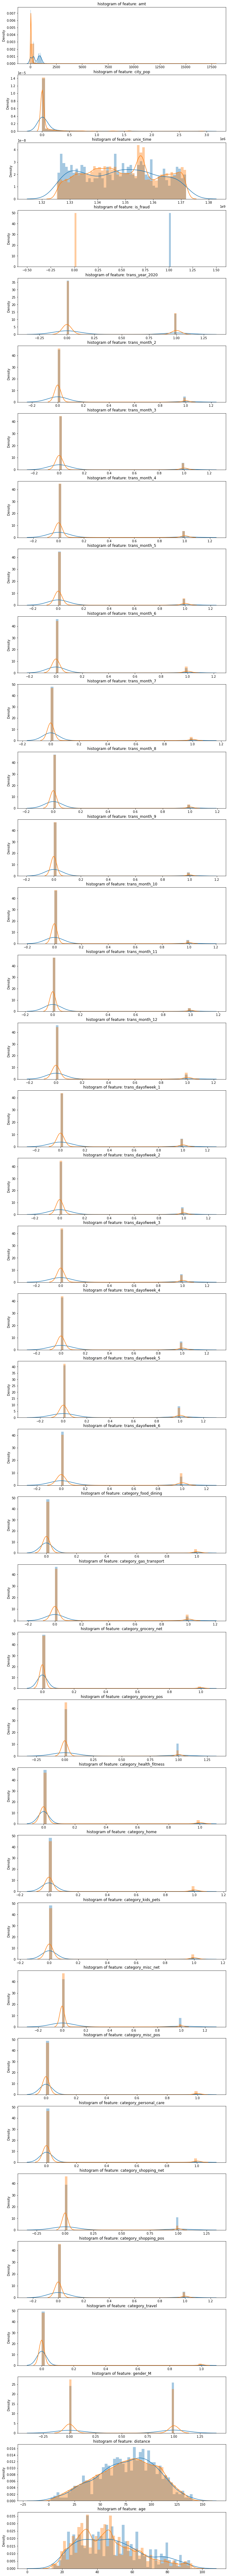

In [44]:
from matplotlib import gridspec

# distribution of anomalous features
features = df.iloc[:,0:39].columns
plt.figure(figsize=(12,39*4))
gs = gridspec.GridSpec(39, 1)

for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df['is_fraud'] == 1], bins=50)
    sns.distplot(df[c][df['is_fraud'] == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))

plt.show()

## Dealing with Imbalance
### SMOTE

In [45]:
# Features 
X = df.drop(columns='is_fraud')

# Target
y = df['is_fraud']

In [46]:
from sklearn.model_selection import train_test_split

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    stratify = y,
    random_state = 1
)

In [47]:
# SMOTE
from imblearn.over_sampling import SMOTE

# instantiate SMOTE sampler, fit it to the training data, then resample the data
X_train_smot, y_train_smot = SMOTE(random_state=1).fit_resample(X_train, y_train)

In [48]:
# check what SMOTE has done

print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution')
display(pd.Series(y_train_smot).value_counts().sort_index())

Original class distribution


0    90274
1      493
Name: is_fraud, dtype: int64


Resampled class distribution


0    90274
1    90274
Name: is_fraud, dtype: int64

In [49]:
# To build a simple model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# scale the sampled train data and the unsampled test data
ss_sm = StandardScaler().fit(X_train_smot)

X_train_sm_ss = ss_sm.transform(X_train_smot)
X_test_ss = ss_sm.transform(X_test)

# Baseline logistic regression
# Instantiate and fit to the remainder set
baseline_logreg = LogisticRegression(random_state=1).fit(X_train_sm_ss, y_train_smot)

# Print the accuracies
print(f'Accuracy on train set: {baseline_logreg.score(X_train_smot, y_train_smot)}')
print(f'Accuracy on test set: {baseline_logreg.score(X_test_ss, y_test)}')

Accuracy on train set: 0.5
Accuracy on test set: 0.9647823963394258


In [50]:
# Pull out the coefficients
coefs = baseline_logreg.coef_

df_coefs = pd.DataFrame(coefs.T, index=X_train.columns, columns=['coefficient_vals'])
df_coefs.sort_values(by=[('coefficient_vals')],key=abs, ascending=True).head(30)

,coefficient_vals
city_pop,0.035017
age,0.053515
distance,-0.102358
trans_month_2,-0.220290
gender_M,-0.252568
trans_month_3,-0.567555
trans_dayofweek_5,-0.676844
trans_dayofweek_4,-0.686342
trans_dayofweek_3,-0.687259
trans_dayofweek_2,-0.711459


In [51]:
# import tools/packages needed for this exercise
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Modeling
- Logistic Regression 
- Decision Tree

In [52]:
# estimators
# note that all the planned steps must be included, but the second elements in each tuple are more like placeholders
estimators = [
    ('scaling', StandardScaler()),
    ('reduce_dim', PCA()),
    ('model', LogisticRegression())
]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = [
    
    # logistic regression 
    {
        'scaling': [StandardScaler()],
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [0.8,0.85,0.9],
        'model': [LogisticRegression()],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['liblinear'],
        'model__C': np.logspace(-3, 3, 7),
        'model__random_state': [1]
    },
    
    # decision tree classifier
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [0.8,0.85,0.9],
        'model': [DecisionTreeClassifier()],
        'model__max_depth': range(5, 20),
        'model__min_samples_leaf': [3, 4, 5],
        'model__random_state': [1]
    }
]

# instantiate cross-validated grid search object with the steps and parameter grid
grid = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 3,
    verbose = 5,
    n_jobs = -1
)

# fit the grid to the unprocessed training data
grid.fit(X_train_smot, y_train_smot)

Fitting 3 folds for each of 177 candidates, totalling 531 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('reduce_dim', PCA()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression()],
                          'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'model__penalty': ['l1', 'l2'],
                          'model__random_state': [1],
                          'model__solver': ['liblinear'], 'reduce_dim': [PCA()],
                          'reduce_dim__n_components': [0.8, 0.85, 0.9],
                          'scaling': [StandardScaler()]},
                         {'model': [DecisionTreeClassifier(max_depth=19,
                                                           min_samples_leaf=3,
                                                           random_state=1)],
                          'model__max

In [53]:
grid.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', PCA(n_components=0.85)),
                ('model',
                 DecisionTreeClassifier(max_depth=19, min_samples_leaf=3,
                                        random_state=1))])

In [54]:
grid.best_params_

{'model': DecisionTreeClassifier(max_depth=19, min_samples_leaf=3, random_state=1),
 'model__max_depth': 19,
 'model__min_samples_leaf': 3,
 'model__random_state': 1,
 'reduce_dim': PCA(n_components=0.85),
 'reduce_dim__n_components': 0.85}

In [55]:
print(f'train_score: {grid.score(X_train_smot, y_train_smot)}')
print(f'test_score: {grid.score(X_test,y_test)}')

train_score: 0.9912488645678712
test_score: 0.9736253566746356


Accuracy scores seem too good to be true, let's move to Model Evaluation.

## Model Evaluation

In [56]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred = grid.predict(X_test) # USING THE UNSAMPLED BUT SCALED TEST DATA

# confusion matrix
conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.1f}%')

0    38689
1      212
Name: is_fraud, dtype: int64

,predicted 0,predicted 1
true 0,37823,866
true 1,160,52


Recall score: 24.5%
Precision score: 5.7%
F1 score: 9.2%


Poor scores on recall, precision and F1.
Let's also fit a regression model.

In [57]:
# scale the sampled train data and the unsampled test data
ss_sm = StandardScaler().fit(X_train_smot)

X_train_sm_ss = ss_sm.transform(X_train_smot)
X_test_ss = ss_sm.transform(X_test)

In [58]:
# instantiate and fit to scaled & sampled training data
logreg_sm = LogisticRegression(random_state=1, max_iter=150).fit(X_train_sm_ss, y_train_smot)

In [59]:
print(logreg_sm.score(X_train_sm_ss, y_train_smot))
print(logreg_sm.score(X_test_ss,y_test))

0.970667080222434
0.9647823963394258


In [60]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred = logreg_sm.predict(X_test_ss) # USING THE UNSAMPLED BUT SCALED TEST DATA

# confusion matrix
conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.1f}%')

0    38689
1      212
Name: is_fraud, dtype: int64

,predicted 0,predicted 1
true 0,37426,1263
true 1,107,105


Recall score: 49.5%
Precision score: 7.7%
F1 score: 13.3%


better now!

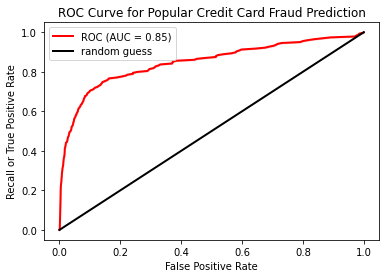

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

# probabilistic prediction
y_test_proba = logreg_sm.predict_proba(X_test_ss)[:,1]

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba)

# plot
plt.figure()
sns.lineplot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
sns.lineplot([0, 1], [0, 1], color='black', lw=2, label='random guess') # random guess
plt.xlabel('False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.title('ROC Curve for Popular Credit Card Fraud Prediction')
plt.legend(loc="best")
plt.show()

The Recall score, Precision score and F1 score are low due to the data imbalance even though SMOTE applied. Moving forward we can try on different techniques for dealing with imbalance.